In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv('dermatology_database_1.csv')

# Handle missing values in 'age' (assuming '?' exists)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

# Split features and target
X = df.drop('class', axis=1)
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Train Random Forest (no scaling needed)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

<ipython-input-2-66e936604d60>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


SVM Accuracy: 0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74

RF Accuracy: 0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy

In [3]:
from sklearn.ensemble import IsolationForest

# Detect outliers
outlier_detector = IsolationForest(contamination=0.05, random_state=42)
outliers = outlier_detector.fit_predict(X)
mask = outliers != -1

# Filter data
X_clean = X[mask]
y_clean = y[mask]

# Split cleaned data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

# Scale cleaned data for SVM
X_train_clean_scaled = scaler.fit_transform(X_train_clean)
X_test_clean_scaled = scaler.transform(X_test_clean)

# Retrain SVM
svm.fit(X_train_clean_scaled, y_train_clean)
y_pred_svm_clean = svm.predict(X_test_clean_scaled)
print("SVM (Cleaned) Accuracy:", accuracy_score(y_test_clean, y_pred_svm_clean))
print(classification_report(y_test_clean, y_pred_svm_clean))

# Retrain RF
rf.fit(X_train_clean, y_train_clean)
y_pred_rf_clean = rf.predict(X_test_clean)
print("RF (Cleaned) Accuracy:", accuracy_score(y_test_clean, y_pred_rf_clean))
print(classification_report(y_test_clean, y_pred_rf_clean))

SVM (Cleaned) Accuracy: 0.9714285714285714
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00        16
           4       0.83      0.83      0.83         6
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.97        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.97      0.97      0.97        70

RF (Cleaned) Accuracy: 0.9714285714285714
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00        16
           4       0.83      0.83      0.83         6
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00    

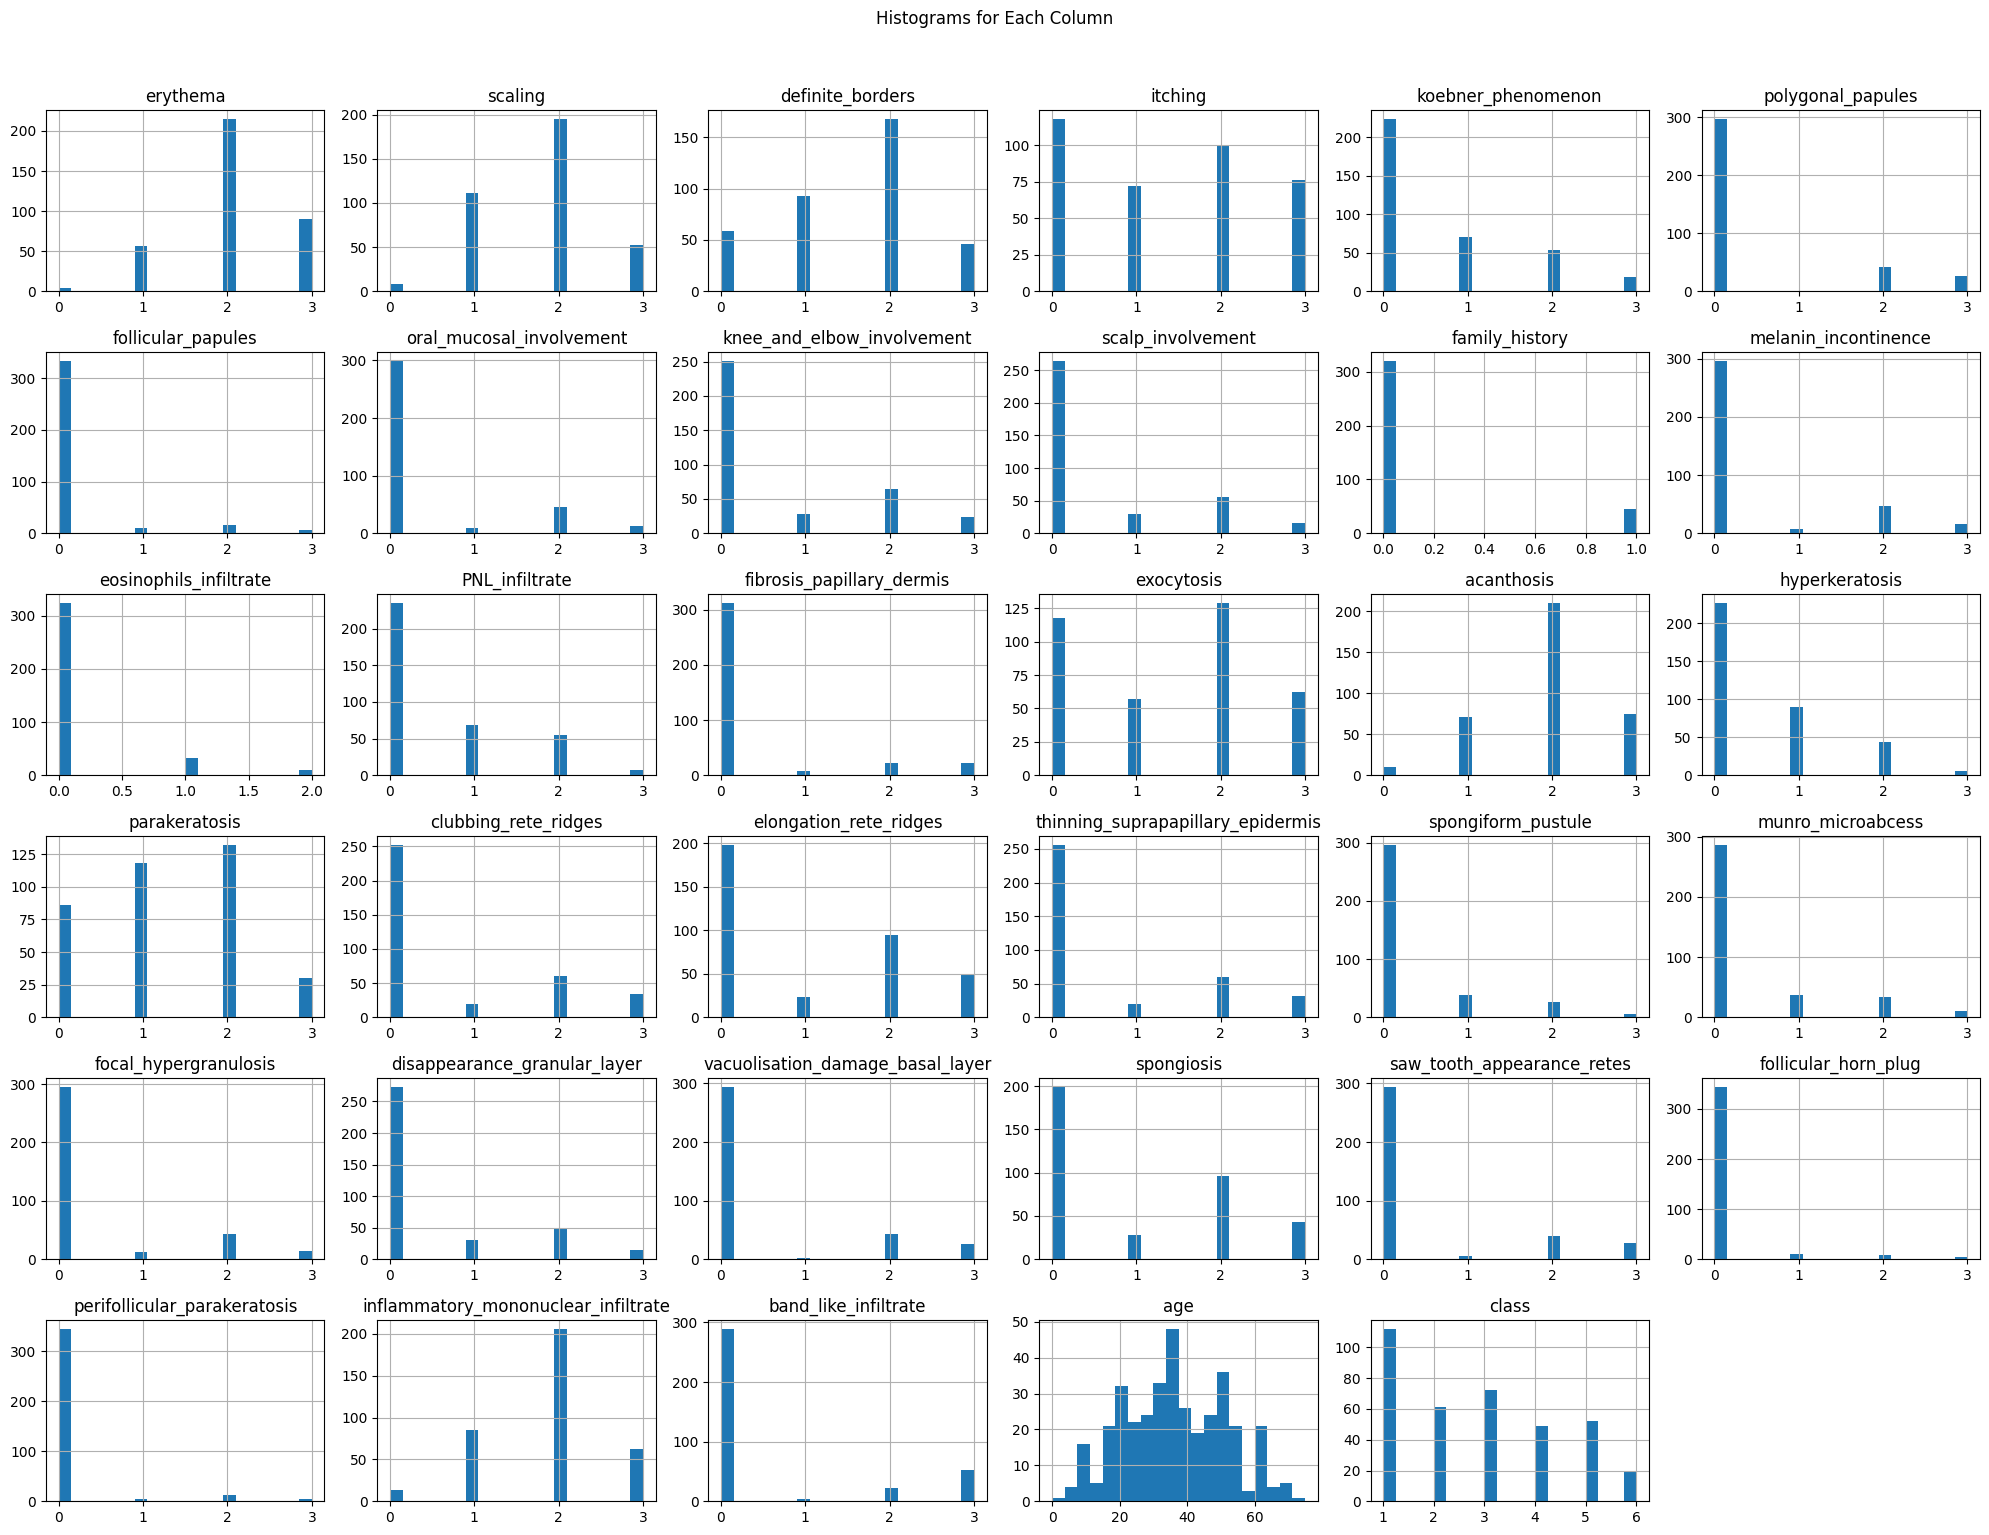

In [4]:
import matplotlib.pyplot as plt

# Plot histograms
df.hist(figsize=(20, 15), bins=20)
plt.suptitle('Histograms for Each Column', y=1.02)
plt.tight_layout()
plt.show()